In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from gfos.data.utils import load_layout
from gfos.utils.plottling import plot_univar_dist

warnings.filterwarnings('ignore')

In [2]:
LAYOUT_DIR = r"H:\data\gfos\predict-ai-model-runtime\npz_all\npz\layout"


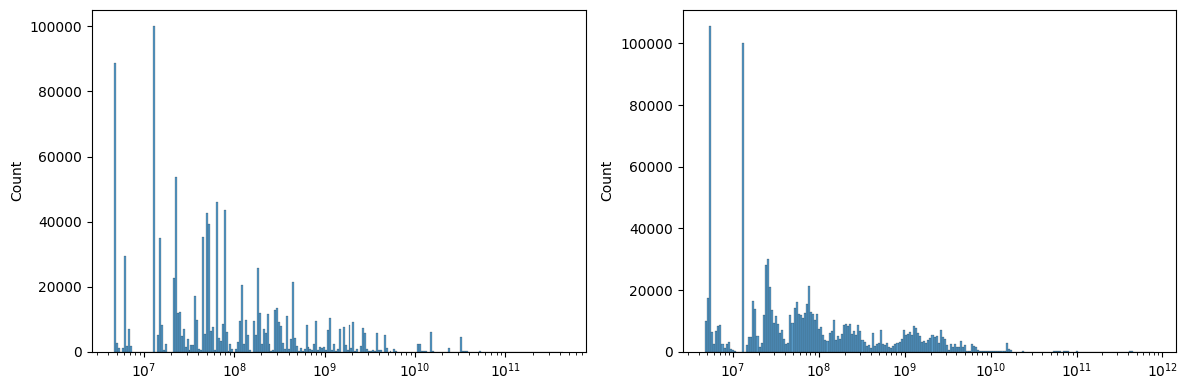

In [105]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))
from pathlib import Path
import seaborn as sns

for i, search in enumerate(("default", "random")):
    layout_files = load_layout(LAYOUT_DIR, compile_type=search, model_type="xla")

    all_runtime = []

    for file in layout_files["train"]:
        npz = np.load(file)
        
        # if Path(file).stem != "inference_mlperf_ssd_1200_batch_128":
        #     continue
        
        runtime = npz["config_runtime"]
        
        # print(Path(file).stem, (runtime > 1e9).sum())
        
        all_runtime.append(runtime)

    all_runtime = np.concatenate(all_runtime, axis=0)
    # bins = np.array([7, 7.5, 8, 9, 20])
    # all_runtime = (all_runtime- all_runtime.mean()) / all_runtime.std()
    # all_runtime = (all_runtime- all_runtime.min()) / (all_runtime.max() - all_runtime.min())
    sns.histplot(all_runtime, ax=axes[i], log_scale=10)

plt.tight_layout()

In [61]:
np.digitize(np.log10(all_runtime), bins=bins)

array([2, 2, 3, ..., 4, 3, 4], dtype=int64)

In [62]:
np.bincount(np.digitize(np.log10(all_runtime), bins=bins))

array([175865, 269151, 224819, 199385, 136706], dtype=int64)

In [31]:
np.sort(all_runtime)[:10]

array([0.00000000e+00, 1.88329173e-09, 3.57661883e-09, 3.92132287e-09,
       4.91769364e-09, 6.17447951e-09, 6.44244286e-09, 6.78588885e-09,
       7.12933483e-09, 7.19978529e-09])

In [66]:
x = np.array([-0.1, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([0, 4, 3, 2], dtype=int64)

In [1]:
import torch

In [2]:
input_num_configs = 12000
num_configs = 200

In [3]:
idx = torch.topk(
    # Sample wrt GumbulSoftmax([NumConfs, NumConfs-1, ..., 1])
    (input_num_configs - torch.arange(input_num_configs)) / input_num_configs
    - torch.log(-torch.log(torch.rand(input_num_configs))),
    num_configs,
)[1]

c:\Users\ntj_0\Anaconda3\envs\gfos\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntj_0\Anaconda3\envs\gfos\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

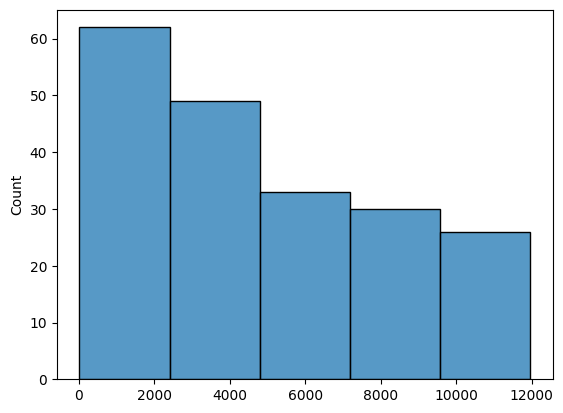

In [5]:
import seaborn as sns
sns.histplot(idx, bins=5)